In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text-dataset/Training_Essay_Data.csv') 
test = pd.read_csv('/kaggle/input/augmented-data-for-llm-detect-ai-generated-text/final_test.csv') 

In [3]:
data

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1
...,...,...
29140,There has been a fuss about the Elector Colleg...,0
29141,Limiting car usage has many advantages. Such a...,0
29142,There's a new trend that has been developing f...,0
29143,As we all know cars are a big part of our soci...,0


In [4]:
test

,text,label
0,The Face on Mars is nothing but a natural occu...,0
1,Students have a higher chance of catching a vi...,0
2,Driverless cars have good and bad things that ...,0
3,Some people might think that traveling in a gr...,1
4,How many of us students want to be forced to d...,0
...,...,...
86582,Dear Principal: I think we should have cell ph...,0
86583,Dear Teacher_NAME\n\nI think that if you try t...,0
86584,"Venus is sometimes called the ""meaning Star."" ...",0
86585,The Seagoing Cowboy Bros\n\nDo you like going ...,0


In [5]:
data.isna().sum()

text         0
generated    0
dtype: int64

In [6]:
data.shape

(29145, 2)

In [7]:
data['generated'].value_counts()

generated
0    17508
1    11637
Name: count, dtype: int64

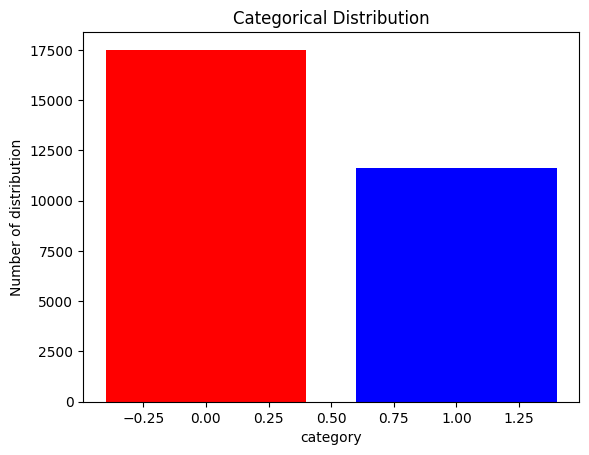

In [8]:
index = data['generated'].value_counts().index
values = data['generated'].value_counts().values

plt.bar(index,values,color=['r','b'])
plt.title("Categorical Distribution")
plt.xlabel("category")
plt.ylabel("Number of distribution")
plt.show()

In [9]:
test.isna().sum()

text     0
label    0
dtype: int64

In [10]:
test['label'].value_counts()

label
0    55845
1    30742
Name: count, dtype: int64

In [11]:
y = data['generated']
data = data.drop('generated', axis=1) 

In [12]:
y_test = test['label']
test = test.drop('label', axis=1)

In [13]:
model_pipline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english',lowercase=True, tokenizer=word_tokenize, ngram_range=(1, 1))),
    ('scaler', MaxAbsScaler()),
    ('model', LogisticRegression(max_iter=200, random_state=42))
]
)

model_pipline.fit(data['text'], y)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<function word_tokenize at 0x7a0ce569c160>)),
                ('scaler', MaxAbsScaler()),
                ('model', LogisticRegression(max_iter=200, random_state=42))])

In [14]:
pred = model_pipline.predict(test['text'])


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     55845
           1       0.94      0.95      0.95     30742

    accuracy                           0.96     86587
   macro avg       0.96      0.96      0.96     86587
weighted avg       0.96      0.96      0.96     86587



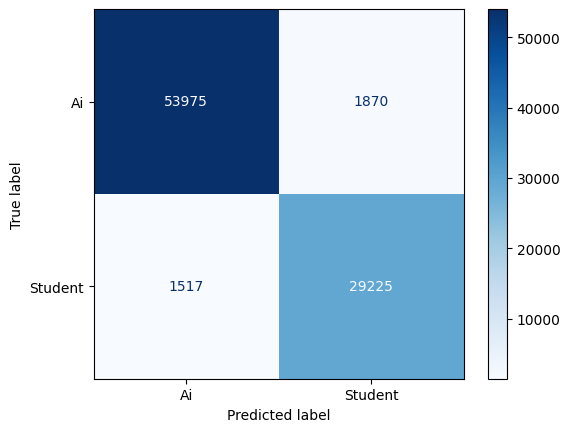

In [15]:
cm = confusion_matrix(y_test, pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ai', 'Human'])
disp.plot(cmap='Blues', values_format='d')

plt.show()

In [21]:
def aigenerate(text: list) -> str:
    predict = model_pipline.predict(text)
    if predict == 1:
        return 'AI Generated'
    if predict == 0:
        return 'Human Written'

In [22]:
print(aigenerate(['Abraham Lincoln (1809–1865) was the 16th President of the United States, serving from March 1861 until his assassination in April 1865. He is one of the most revered figures in American history and is best known for leading the country through its Civil War and for his efforts to end slavery.']))

AI Generated


In [23]:
print(aigenerate(['I love you']))

Human Written
